In [1]:
# Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. 
# Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

import pandas as pd
df = pd.read_csv("england-premier-league-matches-2018-to-2019-stats.csv")
df


,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1533927600,Aug 10 2018 - 7:00pm,complete,74439,Manchester United,Leicester City,Andre Marriner,1,0.00,0.00,...,1.37,4.98,9.81,1.33,2.00,3.60,7.50,2.05,1.69,Old Trafford (Manchester)
1,1533987000,Aug 11 2018 - 11:30am,complete,51749,Newcastle United,Tottenham Hotspur,Martin Atkinson,1,0.00,0.00,...,4.51,3.77,1.84,1.31,1.95,3.50,5.75,1.83,1.87,St. James' Park (Newcastle upon Tyne)
2,1533996000,Aug 11 2018 - 2:00pm,complete,10353,AFC Bournemouth,Cardiff City,Kevin Friend,1,0.00,0.00,...,2.03,3.51,3.96,1.31,1.95,3.45,6.70,1.83,1.83,Vitality Stadium (Bournemouth- Dorset)
3,1533996000,Aug 11 2018 - 2:00pm,complete,24821,Fulham,Crystal Palace,Mike Dean,1,0.00,0.00,...,2.31,3.44,3.26,1.28,1.87,3.20,7.00,1.71,2.00,Craven Cottage (London)
4,1533996000,Aug 11 2018 - 2:00pm,complete,24121,Huddersfield Town,Chelsea,Chris Kavanagh,1,0.00,0.00,...,7.47,4.27,1.51,1.29,1.91,3.30,6.95,2.00,1.71,John Smith's Stadium (Huddersfield- West Yorks...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1557669600,May 12 2019 - 2:00pm,complete,53331,Liverpool,Wolverhampton Wanderers,Martin Atkinson,38,2.78,1.28,...,1.32,5.80,9.00,1.18,1.57,2.45,4.75,1.95,1.83,Anfield (Liverpool)
376,1557669600,May 12 2019 - 2:00pm,complete,74457,Manchester United,Cardiff City,Jonathan Moss,38,2.00,0.61,...,1.28,6.20,10.00,1.12,1.41,2.00,3.60,1.74,2.05,Old Trafford (Manchester)
377,1557669600,May 12 2019 - 2:00pm,complete,30367,Southampton,Huddersfield Town,Lee Probert,38,1.22,0.33,...,1.41,4.90,7.50,1.19,1.61,2.50,4.75,1.80,2.00,St. Mary's Stadium (Southampton- Hampshire)
378,1557669600,May 12 2019 - 2:00pm,complete,60124,Tottenham Hotspur,Everton,Andre Marriner,38,2.06,1.06,...,2.10,3.50,3.55,1.22,1.71,2.80,6.00,1.59,2.30,Tottenham Hotspur Stadium (London)


In [2]:
from scipy.stats import normaltest
df1 = df['attendance']
stat, p = normaltest(df1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=25.131, p=0.000
Probably not Gaussian


In [3]:
df1.describe()

count      380.000000
mean     38186.847368
std      16720.334767
min       9980.000000
25%      25034.750000
50%      31948.000000
75%      53282.750000
max      81332.000000
Name: attendance, dtype: float64

In [4]:
import scipy.stats
  
# Determining the p-value
scipy.stats.t.sf(abs(1.87), df=24)

0.036865328383323424

In [7]:
from scipy.stats import anderson
result = anderson(df1)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=9.207
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [10]:
mitjana_guanyar_casa= df["odds_ft_home_team_win"].mean()
mitjana_guanyar_fora= df["odds_ft_away_team_win"].mean()
std= df["odds_ft_away_team_win"].std()
count= df["odds_ft_away_team_win"].count()

 


t = (mitjana_guanyar_casa - mitjana_guanyar_fora) / (std/((count-1)**0.5))
print(t)



# agafar dues mitjanes q es puguin comparar calcular desviacio estandar i lo ultim es un count de un dels dos


-7.59748961611851


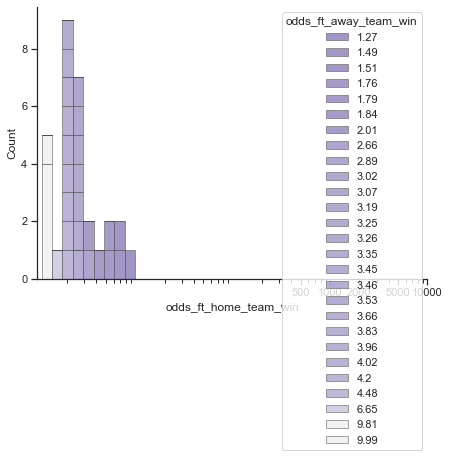

In [17]:
# Representem graficament les dues distribucions
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt



sns.set_theme(style="ticks")

df_2= df.head(30)

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df_2,
    x="odds_ft_home_team_win", hue="odds_ft_away_team_win",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [11]:
from scipy import stats

alpha = 0.05
stat, p = stats.ttest_1samp(df['odds_ft_home_team_win'], df['odds_ft_away_team_win'].mean(), alternative= 'greater')
print(f'stat: {stat}, p: {p}, alpha:{alpha}')
if p > alpha:
    print('p > alpha : H0 cannot be refused. Probably the same distribution')
else:
    print('p < alpha : H0 can be refused. Probably different distributions')

stat: -14.227924945405379, p: 1.0, alpha:0.05
p > alpha : H0 cannot be refused. Probably the same distribution
